In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def MSE(x, y):
    return np.sum((x - y)**2) / len(x)

def lin_act(x):
    return x

def sigmoid(x):
    return np.exp(x) / (np.exp(x)+1)

class Layer:   
    def __init__(self, neurons, input_shape, weights, bias, activation):
        self.neurons = neurons
        self.input_shape = input_shape
        assert weights.shape == (input_shape[1], neurons)
        self.weights = weights
        assert bias.shape == (1, neurons)
        self.bias = bias
        self.activation = activation
        
    def make_zero(neurons, input_shape, activation):
        return Layer(
            neurons = neurons,
            input_shape = input_shape,
            weights = np.zeros((input_shape[1], neurons)),
            bias = np.zeros((1, neurons)),
            activation = activation
        )
    
    def apply(self, inputs):
        intensities = inputs @ self.weights
        return self.activation(intensities + self.bias)


class NN:
    def __init__(self, *layers, input_shape):
        self.input_shape = input_shape
        self.layers = [*layers]
    
    def add_new_zero_layer(self, neurons, activation=sigmoid):
        if self.layers:
            last_layer_shape = self.layers[-1].weights.shape
        else:
            last_layer_shape = self.input_shape
        layer = Layer.make_zero(neurons, last_layer_shape, activation)
        self.layers.append(layer)
        return layer
        
    def apply(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer.apply(x)
        return x

## Simple squares

In [4]:
square_simple_test =  pd.read_csv("LAB1_DANE/regression/square-simple-test.csv")
x = np.array(square_simple_test.iloc[:, 1]).reshape(100, 1)
y= np.array(square_simple_test.iloc[:, 2]).reshape(100, 1)

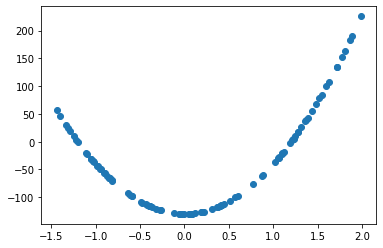

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
nn = NN(input_shape=x.shape)
hidden = nn.add_new_zero_layer(10)
output = nn.add_new_zero_layer(1, activation=lin_act)

In [7]:
hidden.weights 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

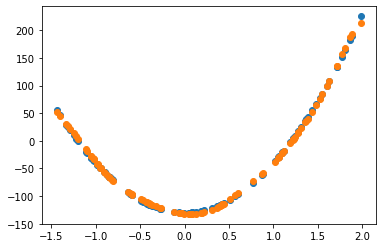

MSE: 6.9112


In [8]:
down1 = -1.
down2 = -0.7
down3 = -0.3
down4 = 0

up1 = 0.5
up2 = 0.72
up3 = 1.0
up4 = 0.9
up5 = 1.3

hidden.weights = 10 * np.array([
    [down1, down2, down3, down4,           0, up1, up2, up3, up4, up5]
])
hidden.bias = 10 * np.array([
    [1.4*down1, 1.06*down2, 0.56*down3, down4, 0, -0.57*up1, -1.16*up2, -1.513*up3, -1.8*up4, -1.8*up5]
])

output.weights = 100 * np.array(
    [[0.5], [0.88], [1.], [1.], [1], [1.], [.9], [0.8], [0.5], [0.6]])
output.bias = np.array([[-253.1 ]])

plt.scatter(x, y)
plt.scatter(x, nn.apply(x))
plt.show()
print(f"MSE: {MSE(nn.apply(x), y):.5}")

# Steps

In [9]:
square_simple_test =  pd.read_csv("LAB1_DANE/regression/steps-large-test.csv")
x = np.array(square_simple_test.iloc[:, 1]).reshape(1000, 1)
y = np.array(square_simple_test.iloc[:, 2]).reshape(1000, 1)

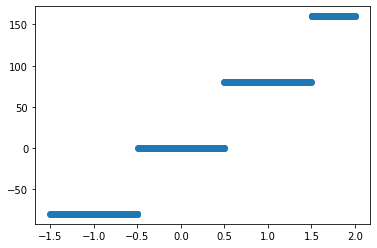

In [10]:
plt.scatter(x, y)
plt.show()

In [11]:
nn = NN(input_shape=x.shape)
hidden = nn.add_new_zero_layer(5)
output = nn.add_new_zero_layer(1, activation=lin_act)

In [12]:
from dataclasses import dataclass
@dataclass
class Step:
    intensity: float
    position: float
    @property
    def bias(self):
        return - self.intensity * self.position
    @property
    def weight(self):
        return self.intensity

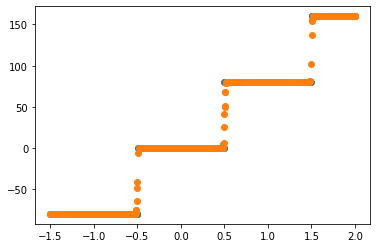

MSE: 8.1295


In [13]:
step1 = Step(250, -0.5)
step2 = Step(250, 0.5)
step3 = Step(250, 1.5)

hidden.weights = np.array([[step1.weight, step2.weight, step3.weight, 0., 0.]])
hidden.bias = np.array([[step1.bias, step2.bias, step3.bias, 0., 0.]])

output.weights = np.array([[80.],[80.],[80.],[0.],[0.]])
output.bias = np.array([[-80]])


plt.scatter(x, y)
plt.scatter(x, nn.apply(x))
plt.show()
print(f"MSE: {MSE(nn.apply(x), y):.5}")